# Final project COGS 118B


## Part 1: Data

In [ ]:
from google.colab import files
import io
import pandas as pd
import numpy as np

In [ ]:
# Upload data
uploaded = files.upload()

Saving Country-data.csv to Country-data (2).csv


In [ ]:
# Convert it into dataframe
df = pd.read_csv(io.BytesIO(uploaded['Country-data.csv']))
df.head()
# Dataset is now stored in a Pandas Dataframe

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Part 2: K-means clustering

### 2.1 Without scaling

In [ ]:
# Convert it into numpy (if needed?)
my_data = df.to_numpy()

In [ ]:
# Look at data
my_data.shape # data shape 167x10
my_data[0:,:] # columns are: Name, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp.

array([['Afghanistan', 90.2, 10.0, ..., 56.2, 5.82, 553],
       ['Albania', 16.6, 28.0, ..., 76.3, 1.65, 4090],
       ['Algeria', 27.3, 38.4, ..., 76.5, 2.89, 4460],
       ...,
       ['Vietnam', 23.3, 72.0, ..., 73.1, 1.95, 1310],
       ['Yemen', 56.3, 30.0, ..., 67.5, 4.67, 1310],
       ['Zambia', 83.1, 37.0, ..., 52.0, 5.4, 1460]], dtype=object)

In [ ]:
# Remove first column
my_data2 = my_data[:,1:]
print(my_data2.shape)
my_data2[0:10,:]

(167, 9)


array([[90.2, 10.0, 7.58, 44.9, 1610, 9.44, 56.2, 5.82, 553],
       [16.6, 28.0, 6.55, 48.6, 9930, 4.49, 76.3, 1.65, 4090],
       [27.3, 38.4, 4.17, 31.4, 12900, 16.1, 76.5, 2.89, 4460],
       [119.0, 62.3, 2.85, 42.9, 5900, 22.4, 60.1, 6.16, 3530],
       [10.3, 45.5, 6.03, 58.9, 19100, 1.44, 76.8, 2.13, 12200],
       [14.5, 18.9, 8.1, 16.0, 18700, 20.9, 75.8, 2.37, 10300],
       [18.1, 20.8, 4.4, 45.3, 6700, 7.77, 73.3, 1.69, 3220],
       [4.8, 19.8, 8.73, 20.9, 41400, 1.16, 82.0, 1.93, 51900],
       [4.3, 51.3, 11.0, 47.8, 43200, 0.873, 80.5, 1.44, 46900],
       [39.2, 54.3, 5.88, 20.7, 16000, 13.8, 69.1, 1.92, 5840]],
      dtype=object)

In [ ]:
# Convert to float 
my_data3 = np.array(list(my_data2), dtype=float)
my_data3

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [ ]:
def calcSqDistances(X, Kmus):
  sqDist = ((-2 * X.dot(Kmus.T) + np.sum(np.multiply(Kmus,Kmus), axis = 1).T).T + np.sum(np.multiply(X,X), axis = 1)).T
  return sqDist

In [ ]:
def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis = 1)
    Rnk = np.eye(sqDmat.shape[1])[m]
    return Rnk

In [ ]:
def recalcMus(X, Rnk):
    N,D = X.shape 
    Kmus_new = (np.divide(X.T.dot(Rnk),np.sum(Rnk,axis = 0))).T
    
    return Kmus_new

In [ ]:
def runKMeans(K, data):
    X = data
    N, D = X.shape

    #allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    #initialize cluster centers by randomly picking points from the data
    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]

    #specify the maximum number of iterations to allow
    maxiters = 1000

    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus)
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus
        
        Kmus = recalcMus(X, Rnk)
        if np.sum(np.abs(KmusOld.reshape((-1, 1)) - Kmus.reshape((-1, 1)))) < 1e-6:
            print(iter)
            break

    return Kmus, Rnk

In [ ]:
Kmus_4, Rnk4 = runKMeans(4, my_data3)
#Kmus_3.shape

print('Based on K-Means clustering, the countries which belongs to cluster 1 are:')

for i in range(len(my_data[:,0])):
  if Rnk4[i,0] ==1:
    print(my_data[i,0])


19
Based on K-Means clustering, the countries which belongs to cluster 1 are:
Australia
Austria
Bahrain
Belgium
Canada
Cyprus
Denmark
Finland
France
Germany
Iceland
Ireland
Israel
Italy
Japan
Netherlands
New Zealand
Oman
Saudi Arabia
Spain
Sweden
United Arab Emirates
United Kingdom
United States


In [ ]:
print('Based on K-Means clustering, the countries which belongs to cluster 2 are:')

for i in range(len(my_data[:,0])):
  if Rnk4[i,1] ==1:
    print(my_data[i,0])


Based on K-Means clustering, the countries which belongs to cluster 2 are:
Afghanistan
Albania
Algeria
Angola
Armenia
Bangladesh
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Burkina Faso
Burundi
Cambodia
Cameroon
Cape Verde
Central African Republic
Chad
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Dominican Republic
Ecuador
Egypt
El Salvador
Eritrea
Fiji
Gambia
Georgia
Ghana
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
India
Indonesia
Iraq
Jamaica
Jordan
Kenya
Kiribati
Kyrgyz Republic
Lao
Lesotho
Liberia
Macedonia, FYR
Madagascar
Malawi
Maldives
Mali
Mauritania
Micronesia, Fed. Sts.
Moldova
Mongolia
Morocco
Mozambique
Myanmar
Namibia
Nepal
Niger
Nigeria
Pakistan
Paraguay
Peru
Philippines
Rwanda
Samoa
Senegal
Serbia
Sierra Leone
Solomon Islands
South Africa
Sri Lanka
St. Vincent and the Grenadines
Sudan
Tajikistan
Tanzania
Thailand
Timor-Leste
Togo
Tonga
Tunisia
Turkmenistan
Uganda
Ukraine
Uzbekistan
Vanuatu
Vietnam
Yemen
Zambia


In [ ]:
print('Based on K-Means clustering, the countries which belongs to cluster 3 are:')

for i in range(len(my_data[:,0])):
  if Rnk4[i,2] ==1:
    print(my_data[i,0])


Based on K-Means clustering, the countries which belongs to cluster 3 are:
Brunei
Kuwait
Luxembourg
Norway
Qatar
Singapore
Switzerland


In [ ]:
print('Based on K-Means clustering, the countries which belongs to cluster 4 are:')

for i in range(len(my_data[:,0])):
  if Rnk4[i,3] ==1:
    print(my_data[i,0])


Based on K-Means clustering, the countries which belongs to cluster 4 are:
Antigua and Barbuda
Argentina
Azerbaijan
Bahamas
Barbados
Belarus
Brazil
Bulgaria
Chile
Costa Rica
Croatia
Czech Republic
Equatorial Guinea
Estonia
Gabon
Greece
Hungary
Iran
Kazakhstan
Latvia
Lebanon
Libya
Lithuania
Malaysia
Malta
Mauritius
Montenegro
Panama
Poland
Portugal
Romania
Russia
Seychelles
Slovak Republic
Slovenia
South Korea
Suriname
Turkey
Uruguay
Venezuela


### 2.2 With scaling

In [ ]:
# We drop the labels in the pandas dataframe too
df2 = df.drop('country', axis=1)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Standard scale the data to avoid features with large values having large impact
from sklearn import preprocessing 
df_scaled=preprocessing.scale(df2)
print(df_scaled)

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


In [ ]:
# Run K-means on scaled data
Kmus_4_scaled, Rnk4_scaled = runKMeans(4, df_scaled)

10


In [ ]:
print('Based on K-Means clustering & scaled data, the countries which belongs to cluster 1 are:')

for i in range(len(df_scaled[:,0])):
  if Rnk4_scaled[i,0] ==1:
    print(my_data[i,0])


Based on K-Means clustering & scaled data, the countries which belongs to cluster 1 are:
Australia
Austria
Belgium
Brunei
Canada
Cyprus
Denmark
Finland
France
Germany
Greece
Iceland
Ireland
Israel
Italy
Japan
Kuwait
Netherlands
New Zealand
Norway
Portugal
Qatar
Slovenia
Spain
Sweden
Switzerland
United Arab Emirates
United Kingdom
United States


In [ ]:
print('Based on K-Means clustering & scaled data, the countries which belongs to cluster 2 are:')

for i in range(len(df_scaled[:,0])):
  if Rnk4_scaled[i,1] ==1:
    print(my_data[i,0])


Based on K-Means clustering & scaled data, the countries which belongs to cluster 2 are:
Afghanistan
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Equatorial Guinea
Eritrea
Gabon
Gambia
Ghana
Guinea
Guinea-Bissau
Haiti
Iraq
Kenya
Kiribati
Lao
Lesotho
Liberia
Madagascar
Malawi
Mali
Mauritania
Mozambique
Myanmar
Namibia
Niger
Nigeria
Pakistan
Rwanda
Senegal
Sierra Leone
South Africa
Sudan
Tanzania
Timor-Leste
Togo
Uganda
Yemen
Zambia


In [ ]:
print('Based on K-Means clustering & scaled data, the countries which belongs to cluster 3 are:')

for i in range(len(df_scaled[:,0])):
  if Rnk4_scaled[i,2] ==1:
    print(my_data[i,0])


Based on K-Means clustering & scaled data, the countries which belongs to cluster 3 are:
Albania
Algeria
Antigua and Barbuda
Argentina
Armenia
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belize
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Bulgaria
Cambodia
Cape Verde
Chile
China
Colombia
Costa Rica
Croatia
Czech Republic
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Fiji
Georgia
Grenada
Guatemala
Guyana
Hungary
India
Indonesia
Iran
Jamaica
Jordan
Kazakhstan
Kyrgyz Republic
Latvia
Lebanon
Libya
Lithuania
Macedonia, FYR
Malaysia
Maldives
Mauritius
Micronesia, Fed. Sts.
Moldova
Mongolia
Montenegro
Morocco
Nepal
Oman
Panama
Paraguay
Peru
Philippines
Poland
Romania
Russia
Samoa
Saudi Arabia
Serbia
Seychelles
Slovak Republic
Solomon Islands
South Korea
Sri Lanka
St. Vincent and the Grenadines
Suriname
Tajikistan
Thailand
Tonga
Tunisia
Turkey
Turkmenistan
Ukraine
Uruguay
Uzbekistan
Vanuatu
Venezuela
Vietnam


In [ ]:
print('Based on K-Means clustering & scaled data, the countries which belongs to cluster 4 are:')

for i in range(len(df_scaled[:,0])):
  if Rnk4_scaled[i,3] ==1:
    print(my_data[i,0])


Based on K-Means clustering & scaled data, the countries which belongs to cluster 4 are:
Luxembourg
Malta
Singapore


## Part C: PCA

### Number of dimensions needed

In [ ]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

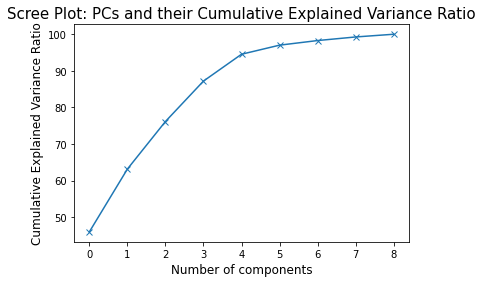

In [ ]:
# Find explained variance for each dimensions
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

# We used the scaled data
reduced_data1=PCA(n_components=9).fit(df_scaled)

explained_variance = np.cumsum(np.round(reduced_data1.explained_variance_ratio_, decimals=5)*100)

# Scree Plot
plt.plot(explained_variance, marker='x')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

### PCA to reduce dimensions

In [ ]:
pca = PCA(n_components = 5)
principalComp = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComp)
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principalDfNP = principalDf.to_numpy()
#principalDfNP
Kmus_4PCA, Rnk4PCA = runKMeans(4, principalDfNP)


In [ ]:
print('Based on K-Means clustering, the countries which belongs to cluster 1 are:')

for i in range(len(my_data[:,0])):
  if Rnk4PCA[i,0] ==1:
    print(my_data[i,0])

In [ ]:
print('Based on K-Means clustering, the countries which belongs to cluster 2 are:')

for i in range(len(my_data[:,0])):
  if Rnk4PCA[i,1] ==1:
    print(my_data[i,0])


In [ ]:
print('Based on K-Means clustering, the countries which belongs to cluster 3 are:')

for i in range(len(my_data[:,0])):
  if Rnk4PCA[i,2] ==1:
    print(my_data[i,0])


In [ ]:
print('Based on K-Means clustering, the countries which belongs to cluster 4 are:')

for i in range(len(my_data[:,0])):
  if Rnk4PCA[i,3] ==1:
    print(my_data[i,0])


## Part D: Clustering with reduced dimensions